NNDL HW3 \\
Kasra Borazjani \\
810196662

# Question 1. Hebbian Learning

## Part 1. Data Preparation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
 A = np.array([
    -1, -1, -1, +1, -1, -1, -1,
    -1, -1, -1, +1, -1, -1, -1,
    -1, -1, -1, +1, -1, -1, -1,
    -1, -1, +1, -1, +1, -1, -1,
    -1, -1, +1, -1, +1, -1, -1,
    -1, +1, +1, +1, +1, +1, -1,
    -1, +1, -1, -1, -1, +1, -1,
    -1, +1, -1, -1, -1, +1, -1,
    +1, +1, +1, -1, +1, +1, +1])

a = np.array([
    -1, +1, -1,
    +1, -1, +1, 
    +1, +1, +1,
    +1, -1, +1,
    +1, -1, +1])
 B = np.array([
    +1, +1, +1, +1, +1, +1, +1,
    +1, -1, -1, -1, -1, -1, +1,
    +1, -1, -1, -1, -1, +1, -1,
    +1, -1, -1, -1, +1, -1, -1,
    +1, +1, +1, +1, -1, -1, -1,
    +1, -1, -1, -1, +1, -1, -1,
    +1, -1, -1, -1, -1, +1, -1,
    +1, -1, -1, -1, -1, -1, +1,
    +1, +1, +1, +1, +1, +1, +1
])


B = np.array([
    +1, +1, +1, +1, +1, +1, +1,
    +1, -1, -1, -1, -1, -1, +1,
    +1, -1, -1, -1, -1, +1, -1,
    +1, -1, -1, -1, +1, -1, -1,
    +1, +1, +1, +1, -1, -1, -1,
    +1, -1, -1, -1, +1, -1, -1,
    +1, -1, -1, -1, -1, +1, -1,
    +1, -1, -1, -1, -1, -1, +1,
    +1, +1, +1, +1, +1, +1, +1
])


b = np.array([
    +1, +1, -1,
    +1, -1, +1, 
    +1, +1, -1,
    +1, -1, +1,
    +1, +1, -1
])


C = np.array([
    -1, -1, +1, +1, +1, +1, -1,
    -1, +1, -1, -1, -1, -1, +1,
    +1, -1, -1, -1, -1, -1, -1,
    +1, -1, -1, -1, -1, -1, -1,
    +1, -1, -1, -1, -1, -1, -1,
    +1, -1, -1, -1, -1, -1, -1,
    +1, -1, -1, -1, -1, -1, -1,
    -1, +1, -1, -1, -1, -1, +1,
    -1, -1, +1, +1, +1, +1, -1
])


c = np.array([
    -1, +1, +1,
    +1, -1, -1, 
    +1, -1, -1,
    +1, -1, -1,
    -1, +1, +1
])

A = A.reshape(-1, 1)
B = B.reshape(-1, 1)
C = C.reshape(-1, 1)

a = a.reshape(-1, 1)
b = b.reshape(-1, 1)
c = c.reshape(-1, 1)

print(A.shape)
print(a.shape)

(63, 1)
(15, 1)


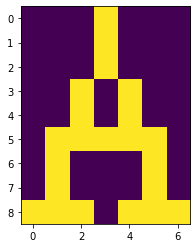

In [ ]:
plt.imshow(A.reshape(9,7))

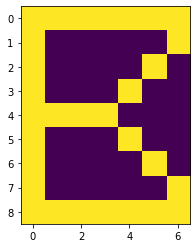

In [ ]:
plt.imshow(B.reshape(9,7))

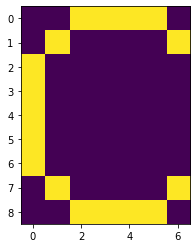

In [ ]:
plt.imshow(C.reshape(9,7))

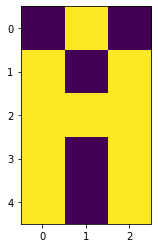

In [ ]:
plt.imshow(a.reshape(5,3))

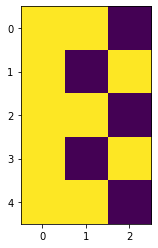

In [ ]:
plt.imshow(b.reshape(5,3))

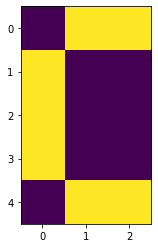

In [ ]:
plt.imshow(c.reshape(5,3))


## Part 2. Learning Method Implementation

In [ ]:
def sign_cus(matrix):
  return 2*(matrix>0)-1

In [ ]:
W = np.zeros((63,15))
charList = [[A,a], [B,b], [C,c]]
for i in range(3):
  W += np.matmul(charList[i][0], charList[i][1].T)

In [ ]:
a_res = sign_cus(np.matmul(A.T, W))
print(a_res)
plt.imshow(a_res.reshape(5,3))

In [ ]:
b_res = np.sign(np.matmul(B.T, W))
print(b_res)
plt.imshow(b_res.reshape(5,3))

In [ ]:
c_res = np.sign(np.matmul(C.T, W))
print(c_res)
plt.imshow(c_res.reshape(5,3))

## Part 3. Detection in the Presence of Noise

### 3.1. Ten percent noise

In [ ]:
try_count = 1000
correct_count_a = 0
correct_count_b = 0
correct_count_c = 0
for i in range(try_count):
  new_A = A.copy()
  new_B = B.copy()
  new_C = C.copy()
  change_indexes = np.random.choice(range(63), int(0.1*63), replace=False)
  for j in change_indexes:
    new_A[j] *= -1
    new_B[j] *= -1
    new_C[j] *= -1
  if np.array_equal(np.sign(np.matmul(new_C.T, W)).T, c):
    correct_count_c += 1
  if np.array_equal(np.sign(np.matmul(new_B.T, W)).T, b):
    correct_count_b += 1
  if np.array_equal(np.sign(np.matmul(new_A.T, W)).T, a):
    correct_count_a += 1

print("Accuracy for letter 'A' = {}".format(correct_count_a/try_count*100))
print("Accuracy for letter 'B' = {}".format(correct_count_b/try_count*100))
print("Accuracy for letter 'C' = {}".format(correct_count_c/try_count*100))

### 3.2. 25% Noise

In [ ]:
try_count = 1000
correct_count_a = 0
correct_count_b = 0
correct_count_c = 0
for i in range(try_count):
  new_A = A.copy()
  new_B = B.copy()
  new_C = C.copy()
  change_indexes = np.random.choice(range(63), int(0.25*63), replace=False)
  for j in change_indexes:
    new_A[j] *= -1
    new_B[j] *= -1
    new_C[j] *= -1
  if np.array_equal(np.sign(np.matmul(new_C.T, W)).T, c):
    correct_count_c += 1
  if np.array_equal(np.sign(np.matmul(new_B.T, W)).T, b):
    correct_count_b += 1
  if np.array_equal(np.sign(np.matmul(new_A.T, W)).T, a):
    correct_count_a += 1

print("Accuracy for letter 'A' = {}".format(correct_count_a/try_count*100))
print("Accuracy for letter 'B' = {}".format(correct_count_b/try_count*100))
print("Accuracy for letter 'C' = {}".format(correct_count_c/try_count*100))

### 3.3. 10% Information Loss

In [ ]:
try_count = 1000
correct_count_a = 0
correct_count_b = 0
correct_count_c = 0
for i in range(try_count):
  new_A = A.copy()
  new_B = B.copy()
  new_C = C.copy()
  change_indexes = np.random.choice(range(63), int(0.1*63), replace=False)
  for j in change_indexes:
    new_A[j] = 0
    new_B[j] = 0
    new_C[j] = 0
  if np.array_equal(np.sign(np.matmul(new_C.T, W)).T, c):
    correct_count_c += 1
  if np.array_equal(np.sign(np.matmul(new_B.T, W)).T, b):
    correct_count_b += 1
  if np.array_equal(np.sign(np.matmul(new_A.T, W)).T, a):
    correct_count_a += 1

print("Accuracy for letter 'A' = {}".format(correct_count_a/try_count*100))
print("Accuracy for letter 'B' = {}".format(correct_count_b/try_count*100))
print("Accuracy for letter 'C' = {}".format(correct_count_c/try_count*100))

### 3.4. 25% Information Loss

In [ ]:
try_count = 1000
correct_count_a = 0
correct_count_b = 0
correct_count_c = 0
for i in range(try_count):
  new_A = A.copy()
  new_B = B.copy()
  new_C = C.copy()
  change_indexes = np.random.choice(range(63), int(0.25*63), replace=False)
  for j in change_indexes:
    new_A[j] = 0
    new_B[j] = 0
    new_C[j] = 0
  if np.array_equal(np.sign(np.matmul(new_C.T, W)).T, c):
    correct_count_c += 1
  if np.array_equal(np.sign(np.matmul(new_B.T, W)).T, b):
    correct_count_b += 1
  if np.array_equal(np.sign(np.matmul(new_A.T, W)).T, a):
    correct_count_a += 1

print("Accuracy for letter 'A' = {}".format(correct_count_a/try_count*100))
print("Accuracy for letter 'B' = {}".format(correct_count_b/try_count*100))
print("Accuracy for letter 'C' = {}".format(correct_count_c/try_count*100))

# Question 2. Auto-Associative Networks

In [ ]:
def rand_vec(size, prob, feat_len):
  return np.random.choice([-1,1], size=(size, feat_len), p=[prob, 1-prob])

In [ ]:
def noise_vec(vec, percent, feat_num):
  new_vec = vec.copy()
  change_indexes = np.random.choice(range(feat_num), int(percent*feat_num), replace=False)
  for j in change_indexes:
    new_vec[:,j] *= -1
  
  return new_vec

In [ ]:
def autoAssWork(feat_len, vectors):
  w = np.zeros((feat_len, feat_len))
  # print(len(vectors[:,0]))
  for i in range(len(vectors[:,0])):
    w += np.matmul(vectors[i].reshape(feat_len,1), vectors[i].reshape(1,feat_len)) - np.identity(feat_len)
  
  return w


In [ ]:
def autoAssOut(try_count, vectors, percent, w, samples, feat_num):
  # print(w)
  total_acc = []
  for i in range(try_count):
    nvec = noise_vec(vectors, percent, feat_num)
    correct_num = 0
    for j in range(samples):
      #print("multiplication: {}".format(np.matmul(nvec[j,:], w)))
      if np.array_equal(np.sign(np.matmul(nvec[j,:], w)).T, vectors[j]):
        correct_num += 1
    total_acc.append(correct_num/len(vectors)*100)
  total_acc = np.asarray(total_acc)
  mean = np.mean(total_acc)
  st_div = np.std(total_acc)
  return mean, st_div

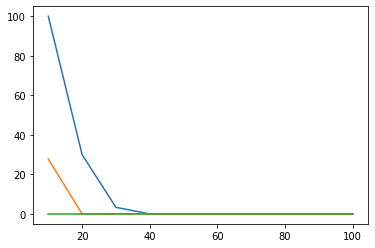

In [ ]:
feature_nums = 100
vec_nums = range(10,110,10)
#vec_nums = [1]
error_percentages = [0,0.2,0.4]
prob = 0.5
try_count = 100

e_means = []
e_stdivs = []
for e in error_percentages:
  n_means = []
  n_stdivs = []
  for n in vec_nums:
    # print("vec len = {}".format(n))
    vectors = rand_vec(n, prob, feature_nums)
    w = autoAssWork(feature_nums, vectors)
    # print("vectors: {}".format(vectors))
    # print("w: \n{}".format(w))
    mean, stdiv = autoAssOut(try_count, vectors, e, w, n, feature_nums)
    n_means.append(mean)
    n_stdivs.append(stdiv)
  e_means.append(n_means)
  e_stdivs.append(n_stdivs)
# print("accuracies: {}".format(e_means))
plt.plot(np.arange(10,110,10), e_means[0])
plt.plot(np.arange(10,110,10), e_means[1])
plt.plot(np.arange(10,110,10), e_means[2])

# Question 3. Hopfield Network

## Part 1. Data Initialization

In [ ]:
zer0 = np.array([
                 +1, +1, +1, +1, +1, +1, +1, +1,
                 +1, +1, +1, +1, +1, +1, +1, +1,
                 +1, +1, -1, -1, -1, -1, +1, +1,
                 +1, +1, -1, -1, -1, -1, +1, +1,
                 +1, +1, -1, -1, -1, -1, +1, +1,
                 +1, +1, -1, -1, -1, -1, +1, +1,
                 +1, +1, +1, +1, +1, +1, +1, +1,
                 +1, +1, +1, +1, +1, +1, +1, +1
])

on1 = np.array([
                -1, -1, +1, +1, +1, -1, -1, -1,
                -1, -1, +1, +1, +1, -1, -1, -1,
                -1, -1, -1, +1, +1, -1, -1, -1,
                -1, -1, -1, +1, +1, -1, -1, -1,
                -1, -1, -1, +1, +1, -1, -1, -1,
                -1, -1, -1, +1, +1, -1, -1, -1,
                -1, -1, -1, +1, +1, -1, -1, -1,
                -1, -1, -1, +1, +1, -1, -1, -1
])

zer0 = zer0.reshape((-1, 1))
on1 = on1.reshape((-1,1))

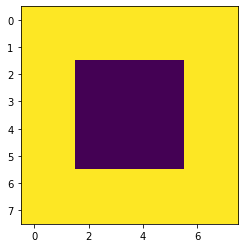

In [ ]:
plt.imshow(zer0.reshape(8,8))

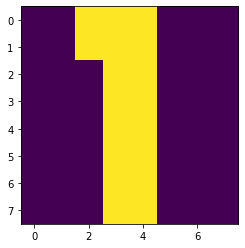

In [ ]:
plt.imshow(on1.reshape(8,8))

## Part 2. Train & Test

In [ ]:
vectors = np.array([zer0, on1])
w = autoAssWork(64, vectors)

In [ ]:
def hopSign(number, thresh):
  if (number>thresh):
    return 1
  elif (number==thresh):
    return number
  else:
    return -1

In [ ]:
def tune_test(vector, w):
  y = vector
  for i in range(len(y)):
    y_in = vector[i] + np.matmul(y, w[:,i])
    y[i] = hopSign(y_in,0)

  return y

[[-1 -1 -1  1  1  1  1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1  1  1
   1 -1 -1 -1  1 -1 -1 -1  1  1 -1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1
  -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1]]


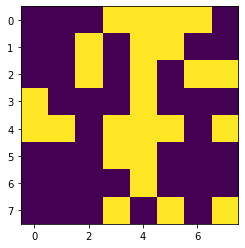

In [ ]:
noise_one = noise_vec(on1.reshape(1,-1),0.3,64)
print(noise_one)
plt.imshow(noise_one.reshape(8,8))

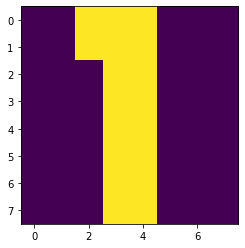

In [ ]:
test_one = tune_test(noise_one[0], w)
plt.imshow(test_one.reshape(8,8))

[[ 1  1  1 -1  1  1  1  1 -1 -1 -1  1  1 -1  1 -1  1 -1 -1 -1 -1  1  1  1
   1 -1 -1  1  1 -1  1  1  1 -1 -1  1 -1 -1 -1  1  1  1 -1 -1 -1  1  1  1
   1  1  1  1 -1  1 -1  1 -1  1  1  1  1 -1  1  1]]


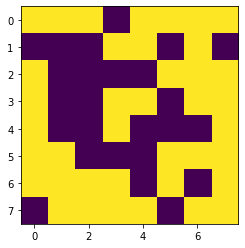

In [ ]:
noise_zero = noise_vec(zer0.reshape(1,-1),0.3,64)
print(noise_zero)
plt.imshow(noise_zero.reshape(8,8))

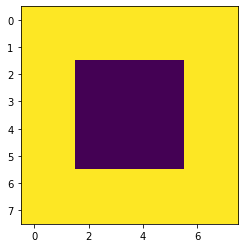

In [ ]:
test_zero = tune_test(noise_zero[0], w)
plt.imshow(test_zero.reshape(8,8))

## Part 3. Hamming Distance

In [111]:
diff = sum([1 for i in range(len(zer0)) if zer0[i]!=on1[i]])
print(diff)

46
